# Image Recognition

In [ ]:
# Mounting Google Drive
from google.colab import drive
from os.path import join
ROOT = '/content/drive'
print(ROOT)
drive.mount(ROOT)

%cd /content/drive/My\ Drive/Colab Notebooks/ProjectData

/content/drive
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/ProjectData


In [ ]:
%ls FaceRecognition/output

data.pickle            label_encoder.pickle  recognizer.pickle
label_encoder1.pickle  recognizer1.pickle


In [50]:
import cv2
import os
import pickle
import numpy as np
import imutils
from imutils import paths
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#from google.colab.patches import cv2_imshow
%matplotlib inline

In [51]:
output_path = "output2/"
img_path = "image2/"

In [52]:
prototxt_path = "face_detection_model/deploy.prototxt"
image_detctor_path =  "face_detection_model/res10_300x300_ssd_iter_140000.caffemodel"
embedder_path = "openface_nn4.small2.v1.t7"
embedding = pickle.load(open(output_path+"data.pickle", "rb"))
recognizer = pickle.load(open(output_path+"recognizer.pickle", "rb"))
label_encoder = pickle.load(open(output_path+"label_encoder.pickle", "rb"))

In [53]:
detector = cv2.dnn.readNetFromCaffe(prototxt_path,image_detctor_path)

In [54]:
embedder = cv2.dnn.readNetFromTorch(embedder_path)

In [55]:
image = cv2.imread("image/m7.jpg")
image = imutils.resize(image,width=600)
(h,w) = image.shape[:2]

image_blob = cv2.dnn.blobFromImage(cv2.resize(image, (300,300)),  1.0, (300,300), (104.0, 177.0, 123.0),swapRB = False, crop = False)


detector.setInput(image_blob)
detections = detector.forward()

In [56]:
print(detections[0,0,1,3:7].shape)
print(np.array([w,h,w,h]).shape)
image[:2].shape

(4,)
(4,)


(2, 600, 3)

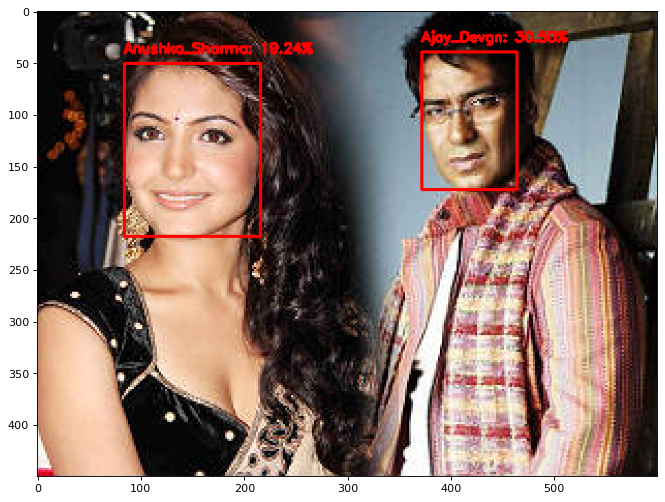

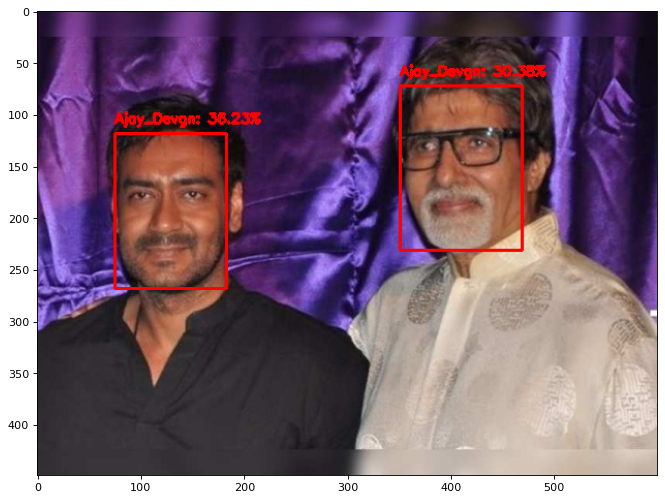

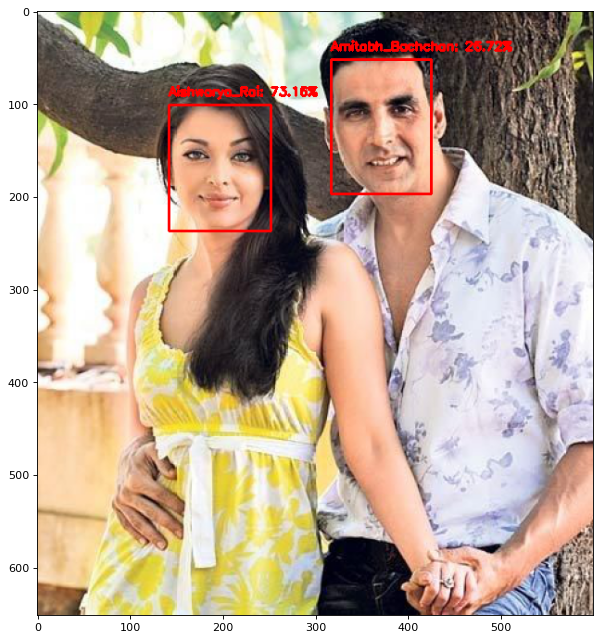

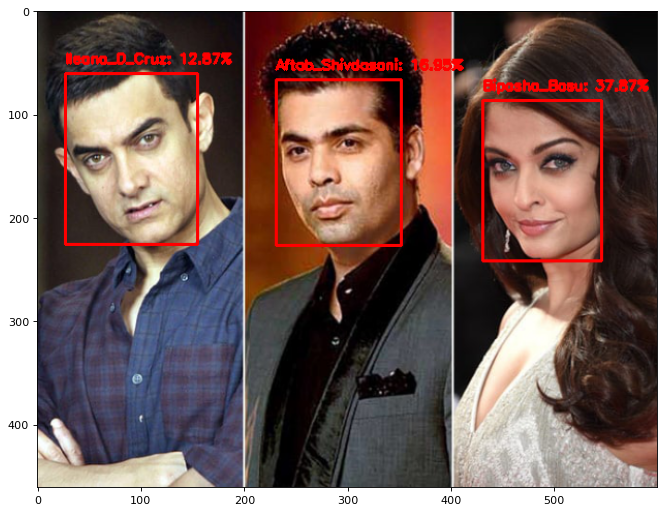

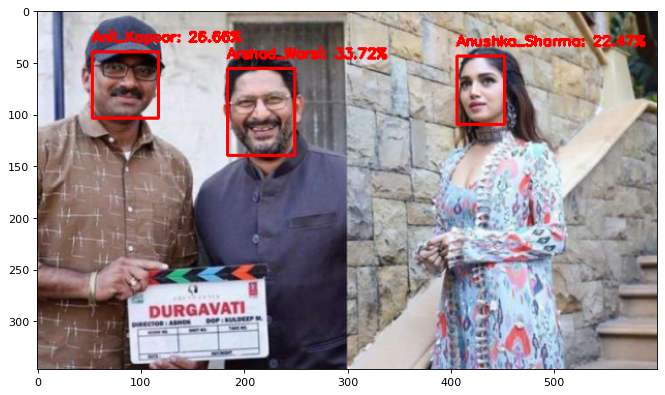

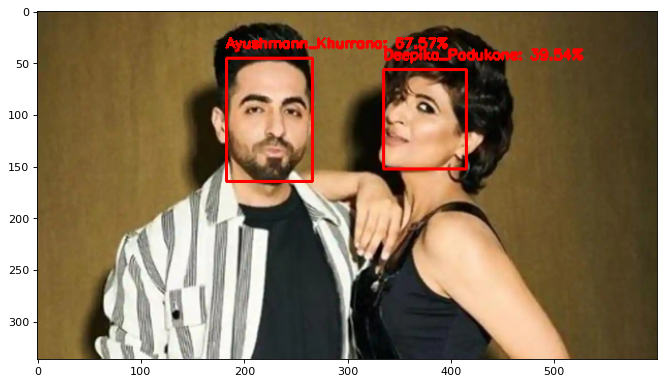

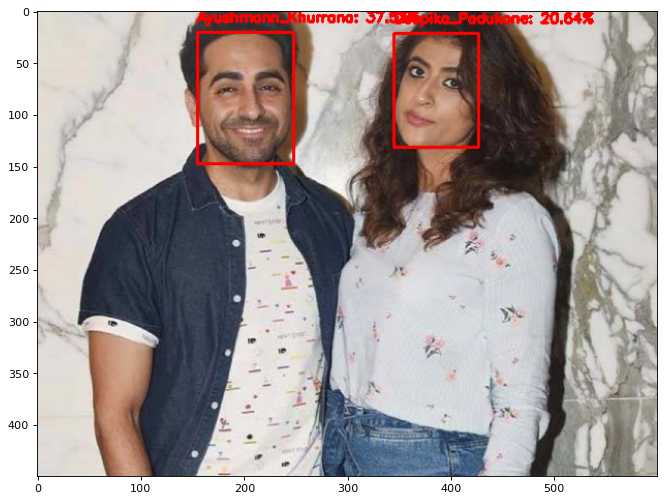

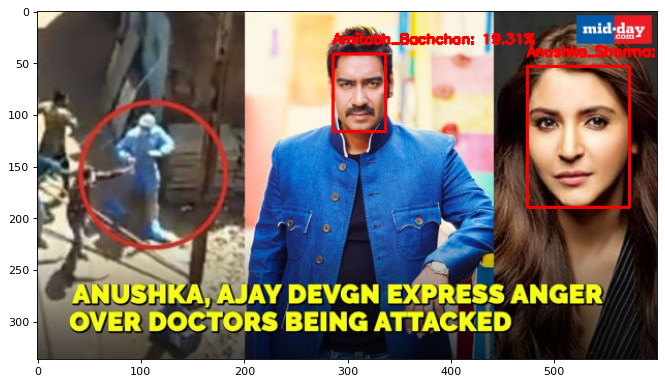

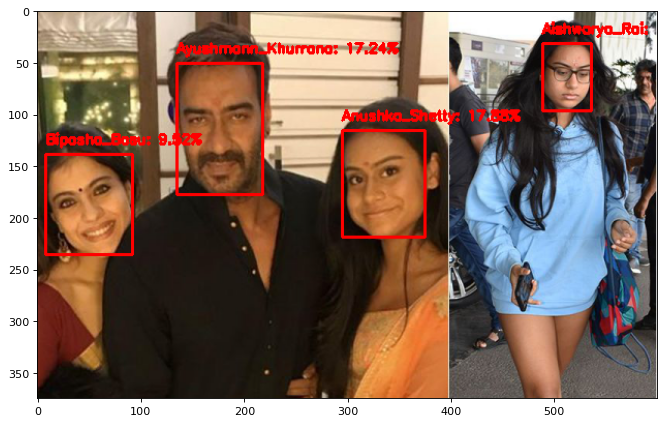

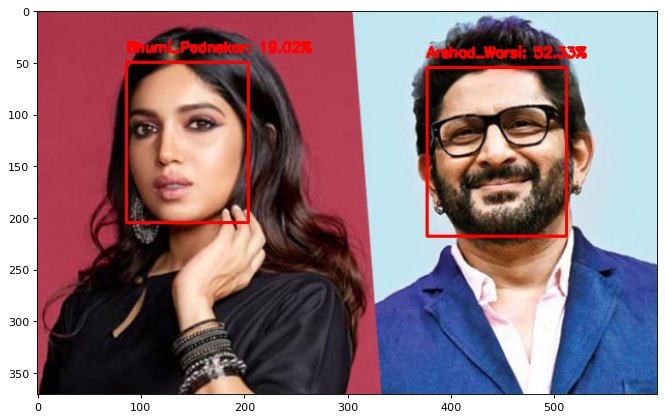

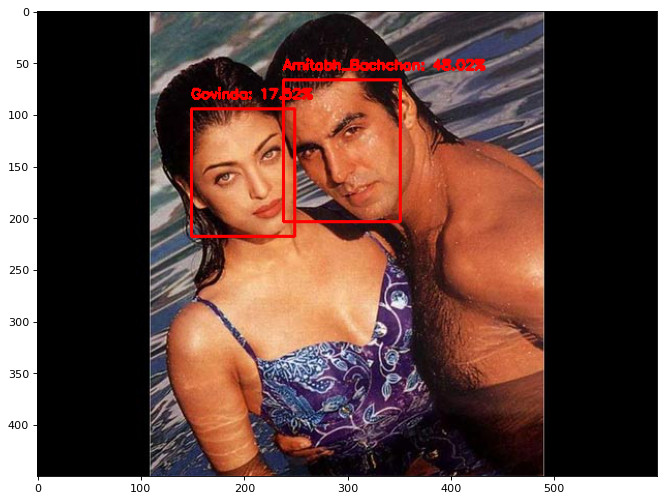

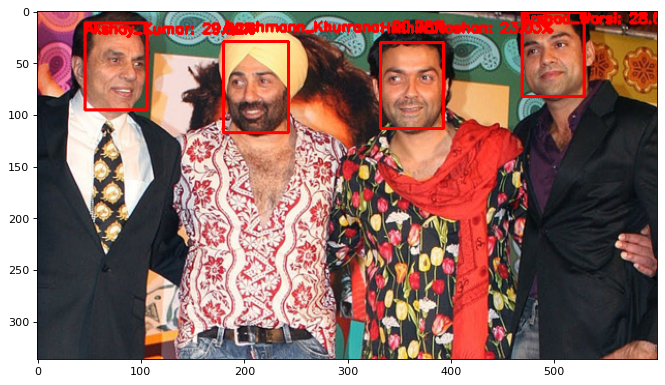

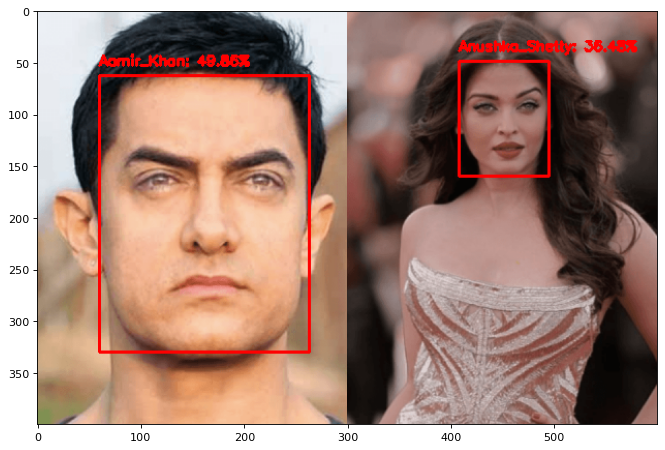

In [58]:
imgPath = paths.list_images(img_path)
for (i, imgP) in enumerate(imgPath):
    image = cv2.imread(imgP)
    image = imutils.resize(image,width=600)
    (h,w) = image.shape[:2]
    
    #print("hello")

    image_blob = cv2.dnn.blobFromImage(cv2.resize(image, (300,300)),  1.0, (300,300), (104.0, 177.0, 123.0),swapRB = False, crop = False)


    detector.setInput(image_blob)
    detections = detector.forward()
    for i in range(0,detections.shape[2]):
        confidence = detections[0,0,i,2]

        if confidence < 0.5:
            continue
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        cv2.rectangle(image, (startX, startY), (endX, endY),(0, 255, 0), 2)

        face = image[startY:endY, startX:endX]
        (fh, fw) = face.shape[:2]

        #print(fh,fw,startX, startY, endX,endY, face.shape)
        if fh < 20  or fw < 20:
            continue 
        faceBlob = cv2.dnn.blobFromImage(face, 1/255, (96,96),(0,0,0), swapRB = True, crop= False)
        embedder.setInput(faceBlob)
        vec = embedder.forward()

        preds = recognizer.predict_proba(vec)[0]
        '''for j in range(0,len(preds)):

            #print(preds)

            #j = np.argmax(preds)
            proba = preds[j]
            name = label_encoder.classes_[j]


            print(name,":",proba,":",i)
        '''

        k = np.argmax(preds)
        proba = preds[k]
        name = label_encoder.classes_[k]
        text = "{}: {:.2f}%".format(name, proba * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY),(0, 0, 255), 2)
        cv2.putText(image, text, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)


    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(img)
    filename = "result2/"+name+str(proba)+".png" 
    plt.imsave(filename,img)
    
